In [1]:
from deepSculpt.curator.tools.params import COLORS
from deepSculpt.sculptor.sculptor import Sculptor
from deepSculpt.manager.tools.plotter import Plotter
from deepSculpt.curator.tools.new_preproccesing import OneHotEncoderDecoder

import os

2023-02-16 12:16:29.894383: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-16 12:16:33.564484: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from deepSculpt.curator.curator import Curator

curator = Curator(
    void_dim=48,
    edge_elements=(3, 0.2, 0.6),
    plane_elements=(3, 0.2, 0.6),
    volume_elements=(3, 0.2, 0.6),
    step=None,
    grid=1,
    directory='.',
    n_samples=10,
)

# Creates the data
volumes_void, materials_void = curator.create_sculpts()


 🔽 Just created 'volume_data' shaped (10, 48, 48, 48) and 'material_data' shaped(10, 48, 48, 48)


In [3]:
materials = [COLORS['edges'], COLORS['planes']] + COLORS['volumes'] + [None]

materials

['dimgrey', 'snow', 'crimson', 'turquoise', 'gold', None]

In [4]:
preprocessing_class_o = OneHotEncoderDecoder(materials_void, materials=materials, verbose=1)

o_encode, o_classes = preprocessing_class_o.ohe_encode()


⏹ A number of 10 samples shaped (10, 48, 48, 48) have been encoded in 6 classes: ['dimgrey' 'snow' 'crimson' 'turquoise' 'gold' None]


In [5]:
decode_volumes_void, decode_materials_void = preprocessing_class_o.ohe_decode(o_encode)



⏹ A number of 10 samples shaped (10, 48, 48, 48, 6) have been decoded in 6 classes: ['dimgrey' 'snow' 'crimson' 'turquoise' 'gold' None]



 🔽 Plotting [16-02-2023-12-17-29]

 🔽 Just created a snapshot image[16-02-2023-12-17-29].png @ /Users/juan-garassino/code/juan-garassino/deepSculpt/results/picture

 🔽 Just created a vectorial snapshot vectorial[16-02-2023-12-17-29].svg @ /Users/juan-garassino/code/juan-garassino/deepSculpt/results/vectorial

 🔽 Just created a volume array volume_array[16-02-2023-12-17-29] @ /Users/juan-garassino/code/juan-garassino/deepSculpt/results/volume_array

 🔽 Just created a material array material_array[16-02-2023-12-17-29] @ /Users/juan-garassino/code/juan-garassino/deepSculpt/results/material_array


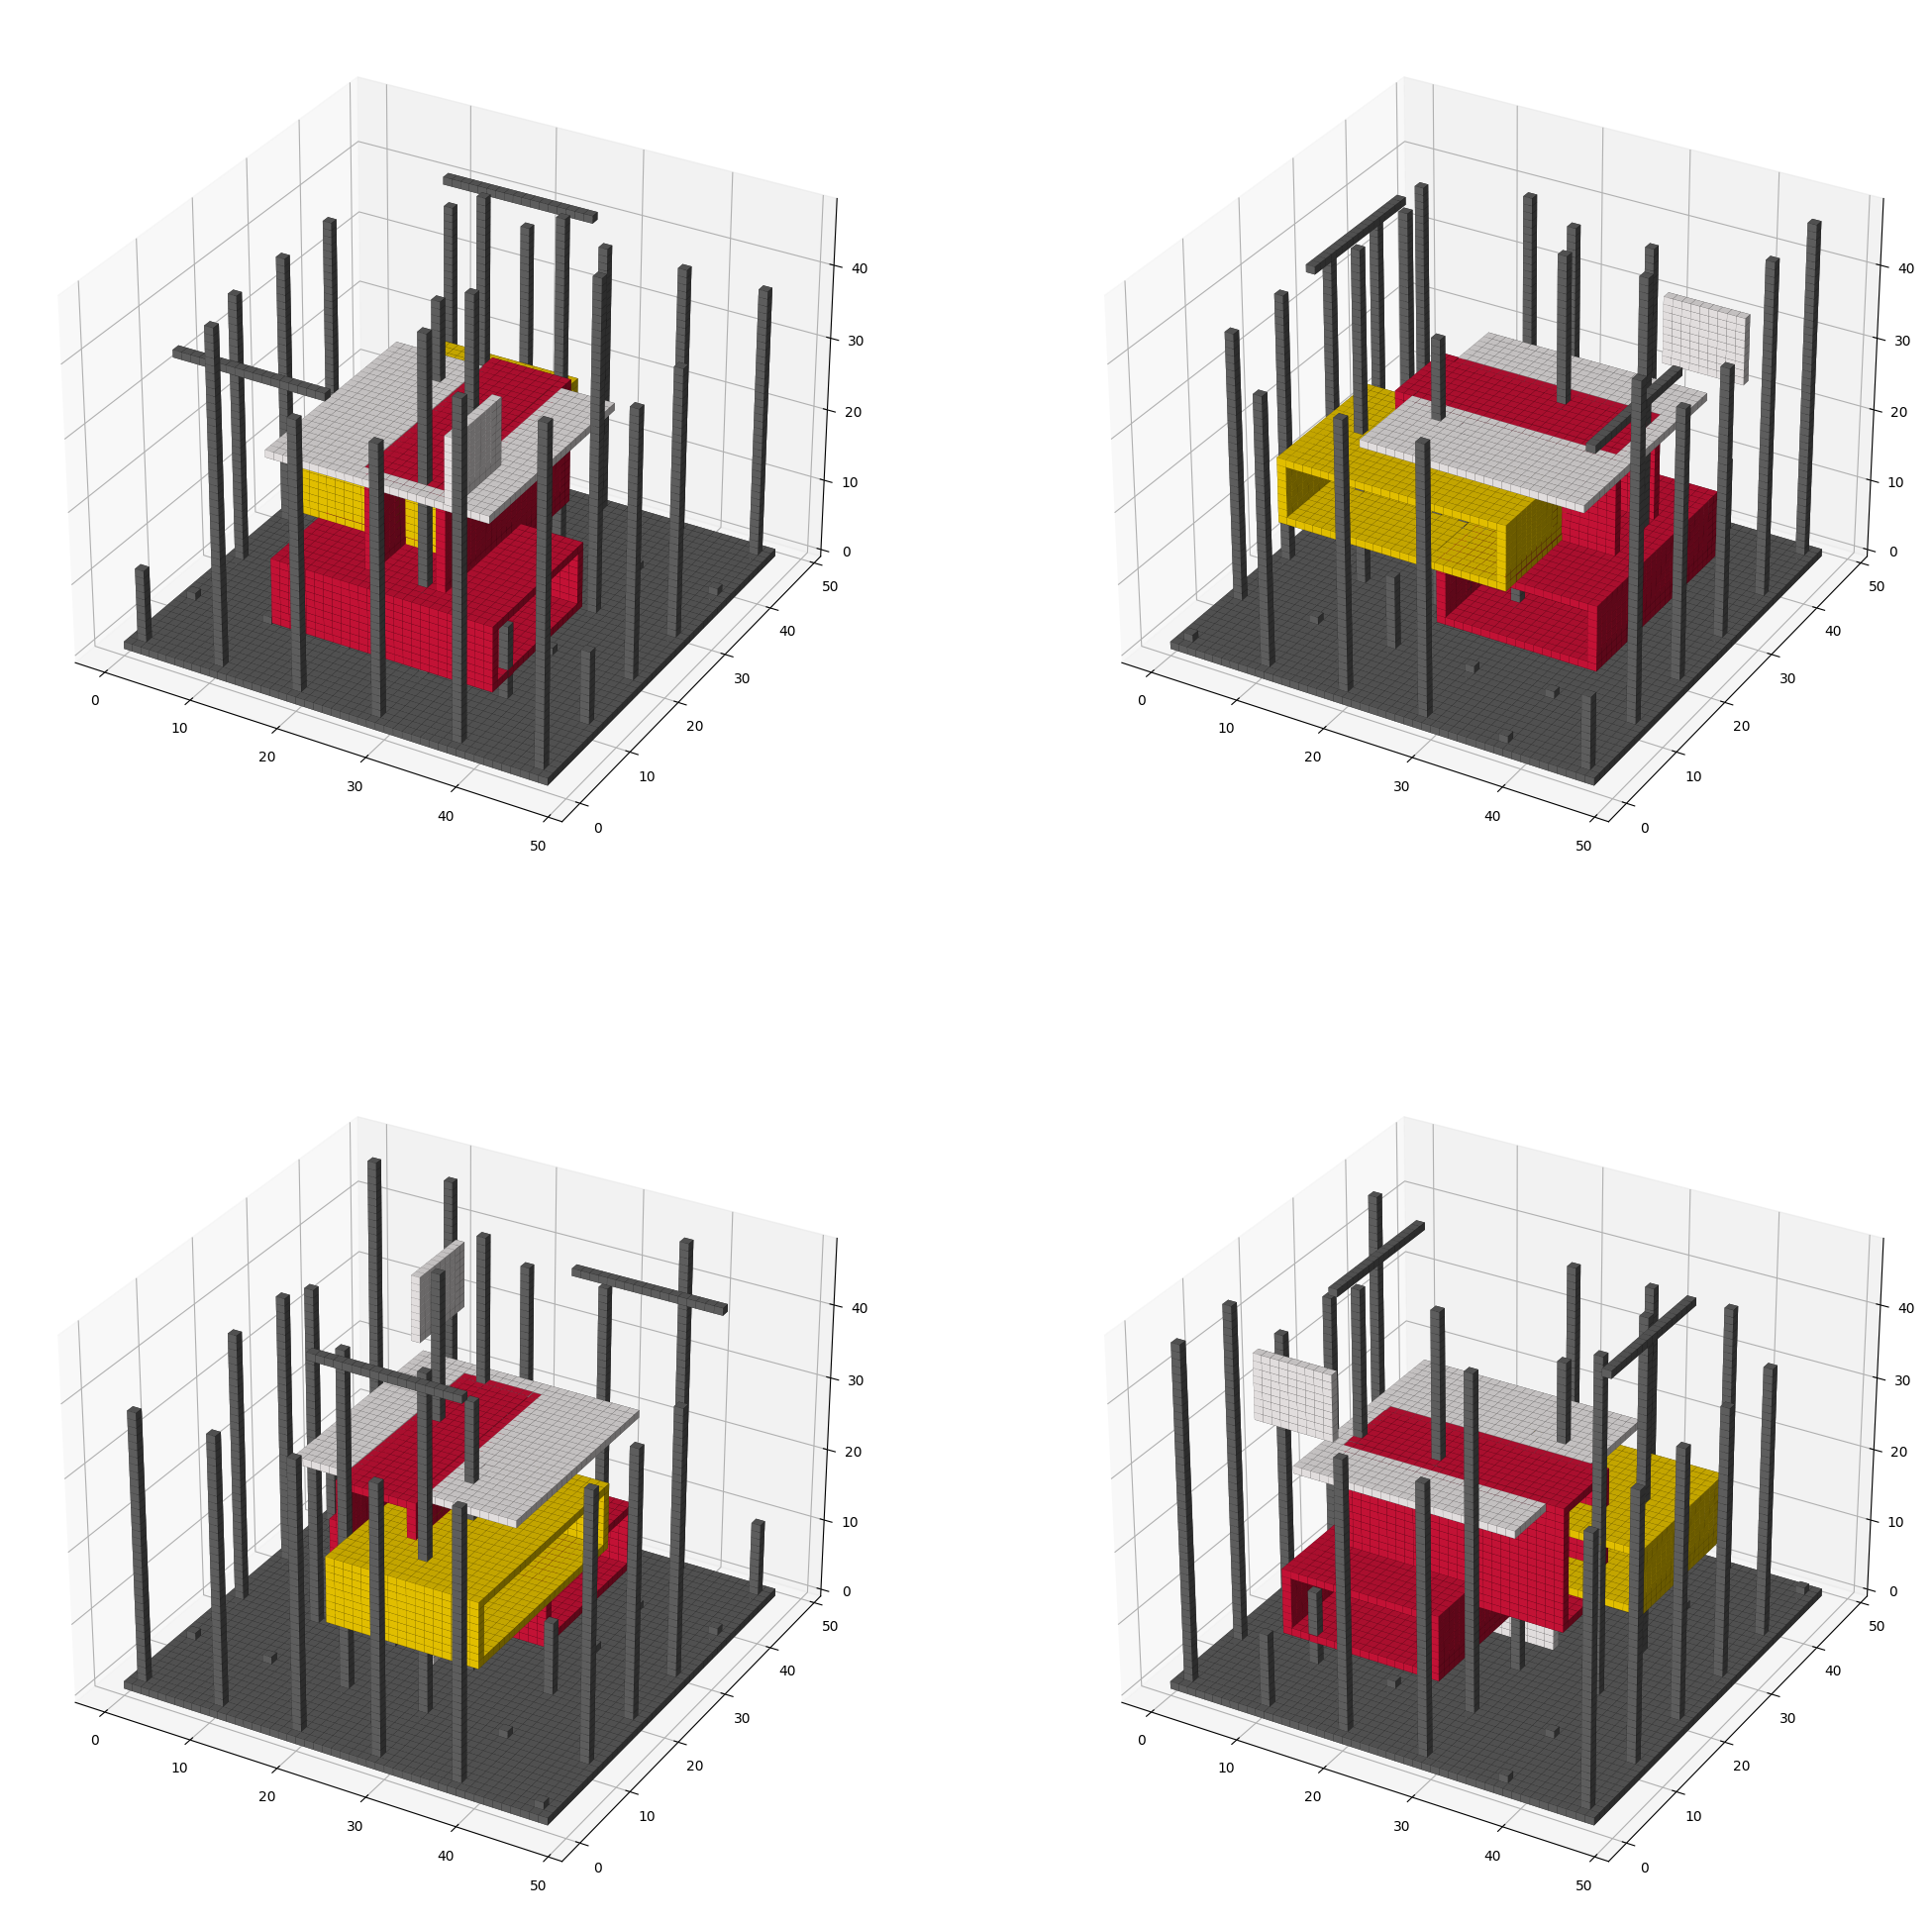

In [6]:
plot = Plotter(volumes=decode_volumes_void[0, :, :, :],
               colors=decode_materials_void[0, :, :, :])

out_dir = os.path.join(os.environ.get("HOME"), "code", "juan-garassino",
                       "deepSculpt", 'results')

plot.plot_sculpture(out_dir)


 🔽 Plotting [16-02-2023-12-19-35]

 🔽 Just created a snapshot image[16-02-2023-12-19-35].png @ /Users/juan-garassino/code/juan-garassino/deepSculpt/results/picture

 🔽 Just created a vectorial snapshot vectorial[16-02-2023-12-19-35].svg @ /Users/juan-garassino/code/juan-garassino/deepSculpt/results/vectorial

 🔽 Just created a volume array volume_array[16-02-2023-12-19-35] @ /Users/juan-garassino/code/juan-garassino/deepSculpt/results/volume_array

 🔽 Just created a material array material_array[16-02-2023-12-19-35] @ /Users/juan-garassino/code/juan-garassino/deepSculpt/results/material_array


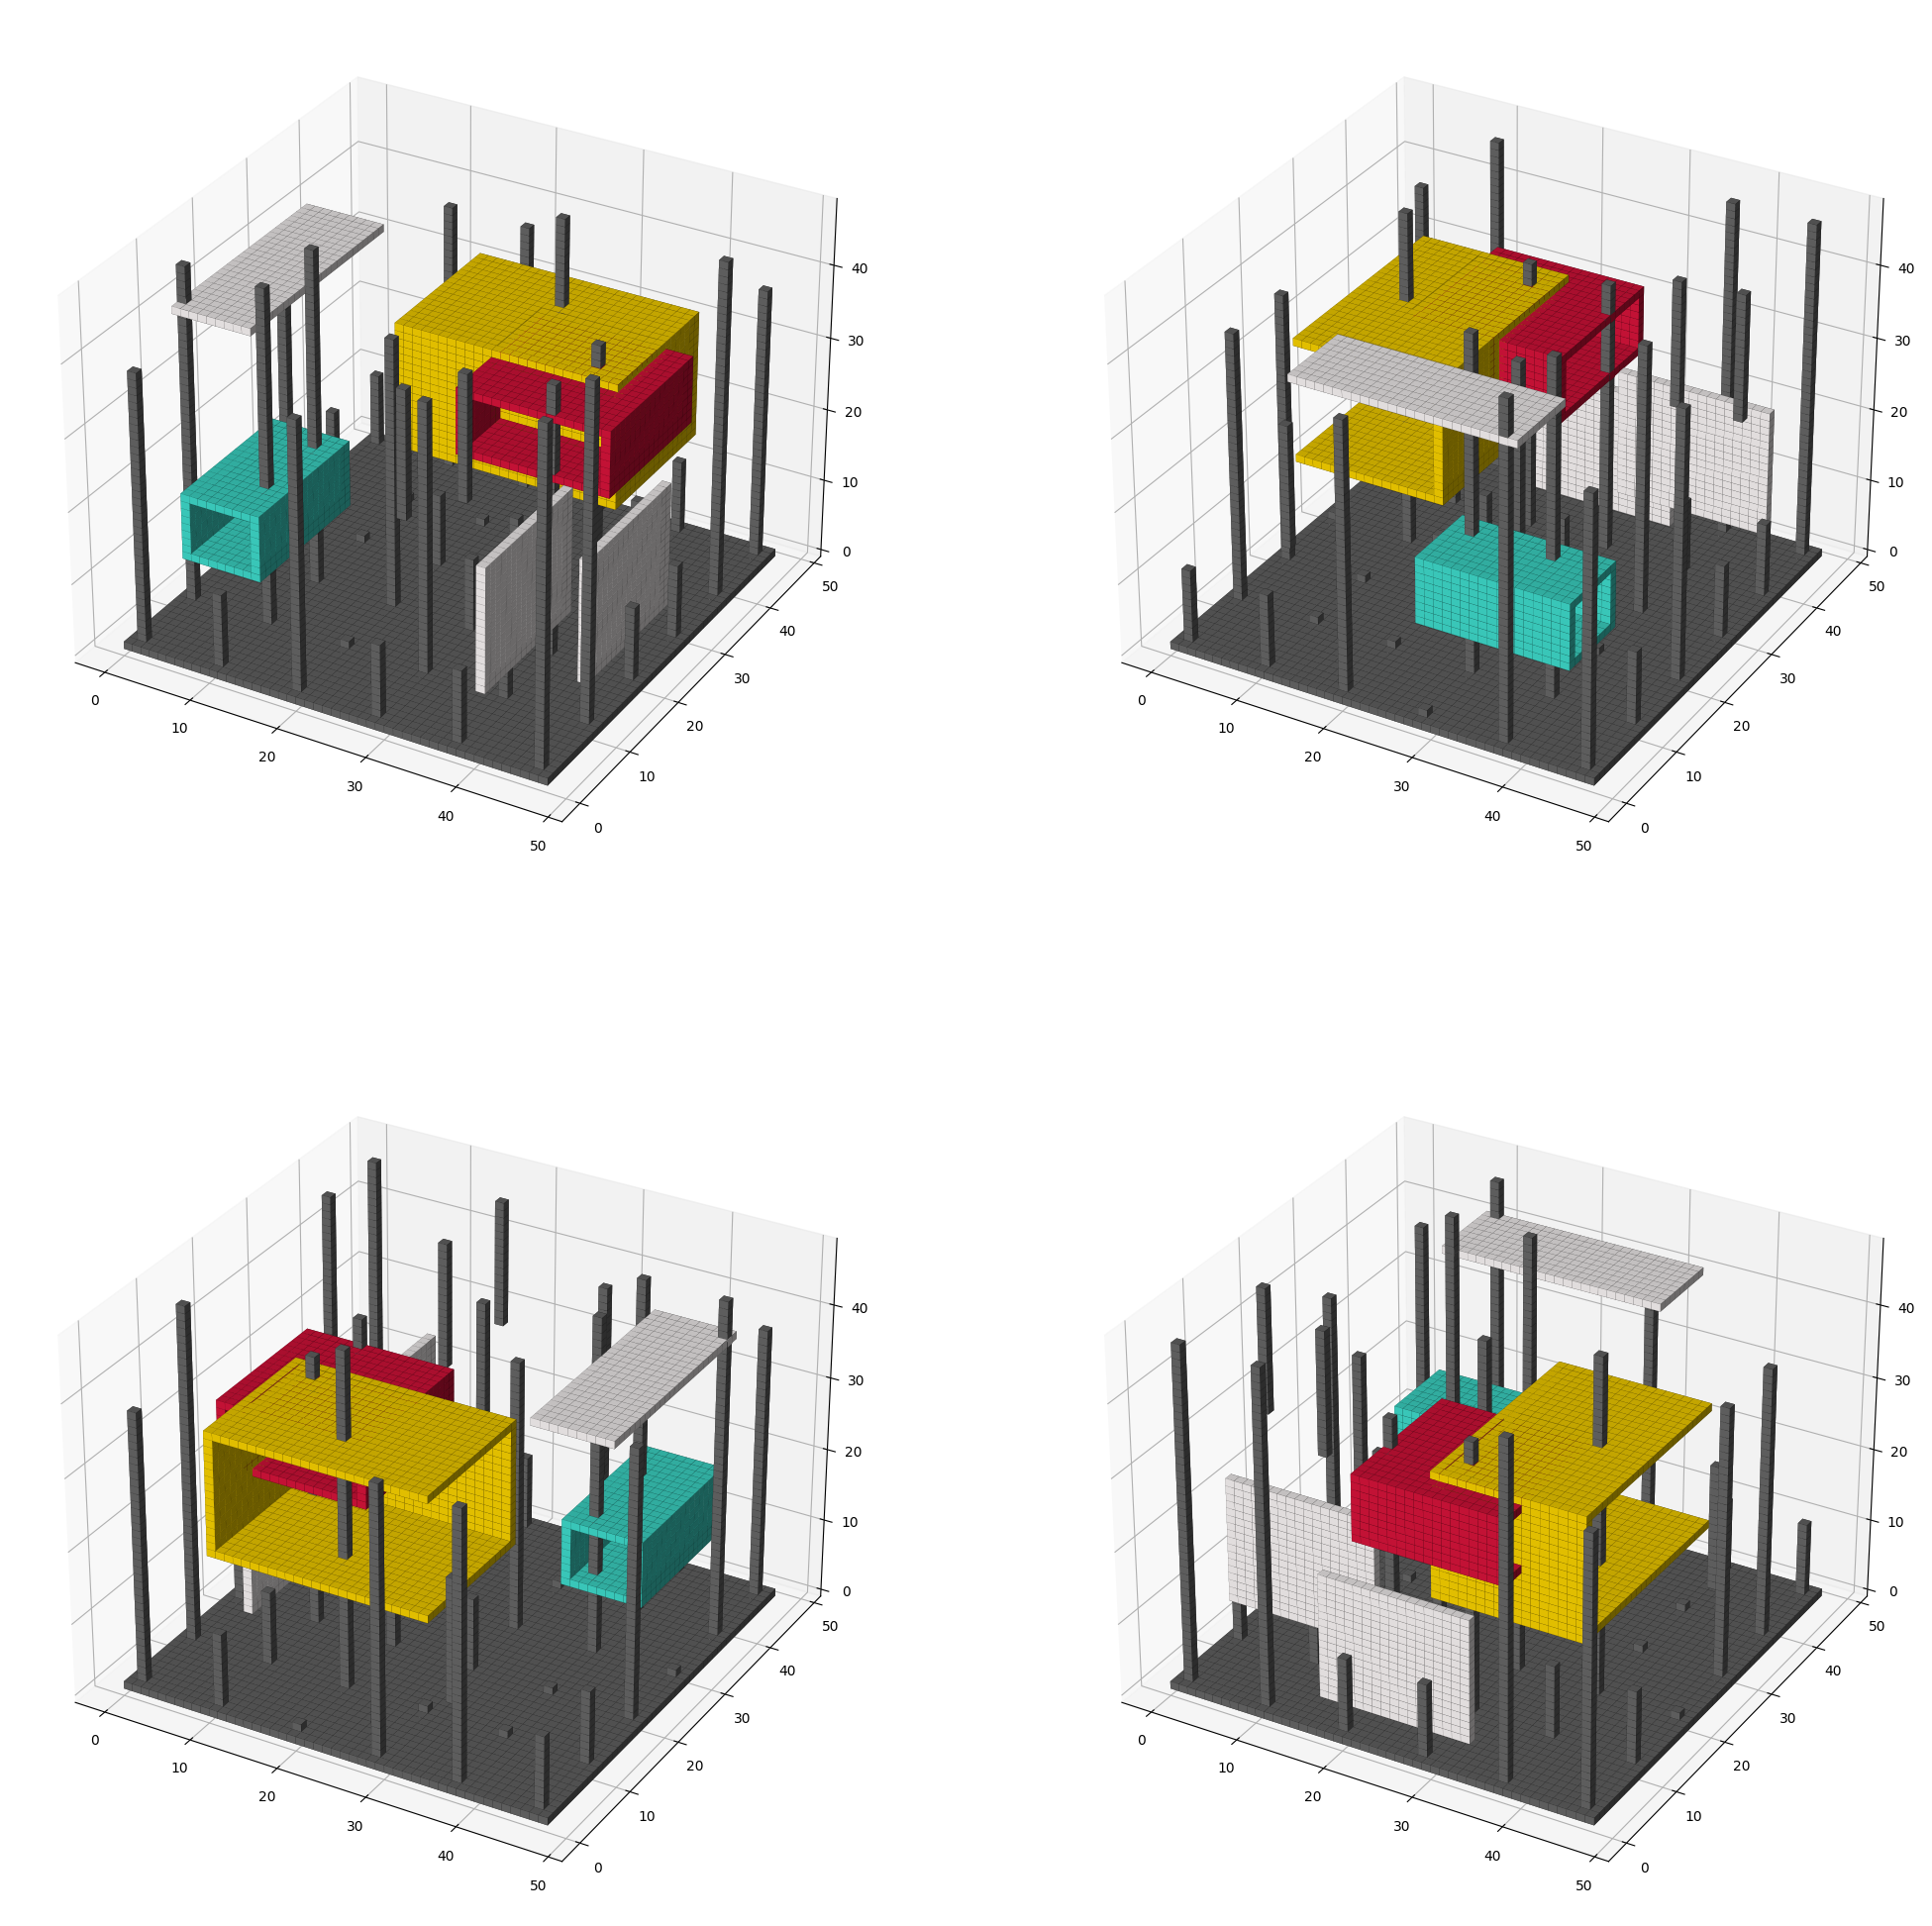

In [7]:
plot = Plotter(volumes=decode_volumes_void[3, :, :, :],
               colors=decode_materials_void[3, :, :, :])

out_dir = os.path.join(os.environ.get("HOME"), "code", "juan-garassino",
                       "deepSculpt", 'results')

plot.plot_sculpture(out_dir)